In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
df1 = pd.read_csv("/Users/cram/Downloads/heart.csv")

In [42]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
x = df1[['age', 'sex', 'cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [45]:
clf = RandomForestClassifier(n_estimators = 300)

In [46]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [49]:
np.mean(y_pred!=y_test)

0.19736842105263158

In [50]:
confusion_matrix(y_test,y_pred)

array([[30,  8],
       [ 7, 31]])

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.79      0.82      0.81        38

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [52]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [53]:
accuracy

0.8026315789473685

In [54]:
clf.feature_importances_

array([0.08891437, 0.03404496, 0.12597827, 0.08255955, 0.07841835,
       0.00905011, 0.02084885, 0.11070382, 0.06443254, 0.10832999,
       0.04116514, 0.10091704, 0.13463703])

In [55]:
features = df1.columns.values.tolist()[0:13]
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [56]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

thal        0.134637
cp          0.125978
thalach     0.110704
oldpeak     0.108330
ca          0.100917
age         0.088914
trestbps    0.082560
chol        0.078418
exang       0.064433
slope       0.041165
sex         0.034045
restecg     0.020849
fbs         0.009050
dtype: float64

No handles with labels found to put in legend.


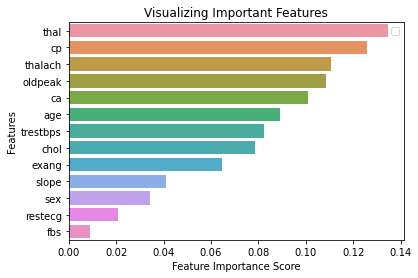

In [58]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [100]:
df = pd.read_csv("/Users/cram/Downloads/training_mush.csv")

In [112]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [72]:
X = df.drop(['class'], axis=1)
Y = df['class']

In [73]:
rf = RandomForestClassifier(random_state=0, criterion='entropy')

In [74]:
parametrs = {'n_estimators':[10,20,30,40,50], 'max_depth':[1,3,5,7,9,11], 'min_samples_leaf':[1,2,3,4,5,6,7], 'min_samples_split': [2,4,6,8]}

In [75]:
grid = GridSearchCV(rf,parametrs,cv=3, n_jobs = -1)

In [76]:
grid.fit(X, Y)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [115]:
best_clf_es = grid.best_estimator_

In [116]:
best_clf_es

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=10,
                       random_state=0)

In [78]:
best_clf = grid.best_params_

In [79]:
best_clf

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [80]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=10,
                       random_state=0)

In [83]:
df_test = pd.read_csv("/Users/cram/Downloads/testing_mush.csv")

In [117]:
best_clf_es.predict(df_test).sum()

976

In [119]:
invasion = pd.read_csv("/Users/cram/Downloads/invasion.csv")
operative_information = pd.read_csv("/Users/cram/Downloads/operative_information.csv")

In [121]:
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [124]:
x1 = invasion.drop(['class'], axis=1)
y1 = invasion['class']

In [156]:
rf_trans = RandomForestClassifier(criterion='entropy')

In [157]:
par = {'n_estimators':(1,20,1),'max_depth' : (1,13,2),'min_samples_leaf' :(1,8), 'min_samples_split' :(2,10,2)}

In [158]:
grid1 = GridSearchCV(rf_trans,par,cv=3, n_jobs = -1)

In [159]:
grid1.fit(x1, y1)

GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': (1, 13, 2), 'min_samples_leaf': (1, 8),
                         'min_samples_split': (2, 10, 2),
                         'n_estimators': (1, 20, 1)})

In [160]:
best_clf_estum = grid1.best_params_

In [161]:
operative_information=grid1.predict

In [162]:
operative_information

<function sklearn.model_selection._search.BaseSearchCV.predict(self, X)>

In [163]:
s = pd.Series(operative_information).value_counts()

In [166]:
s

<function BaseSearchCV.predict at 0x7fa1088720d0>    1
dtype: int64